C:\Users\Asus\AppData\Local\Temp\ipykernel_14692\1809969837.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=dataset, palette='magma')


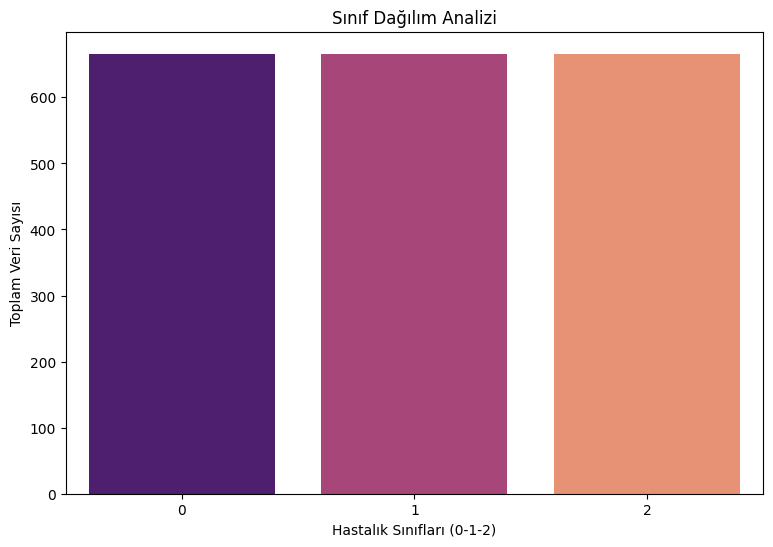

c:\Users\Asus\Documents\YapaySinirAğları\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,503 (25.40 KB)

 Trainable params: 6,503 (25.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3561 - loss: 1.1097 - val_accuracy: 0.3800 - val_loss: 1.1002
Epoch 2/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4074 - loss: 1.0847 - val_accuracy: 0.3525 - val_loss: 1.1073
Epoch 3/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4068 - loss: 1.0715 - val_accuracy: 0.3625 - val_loss: 1.1052
Epoch 4/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4349 - loss: 1.0592 - val_accuracy: 0.3575 - val_loss: 1.1068
Epoch 5/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 1.0463 - val_accuracy: 0.3425 - val_loss: 1.1195
Epoch 6/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4599 - loss: 1.0379 - val_accuracy: 0.3975 - val_loss: 1.1136
Epoch 7/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4787 - loss: 1.0267 - val_accuracy: 0.3550 - val_loss: 1.1224
Epoch 8/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4969 - loss: 1.0142 - val_accuracy: 0.

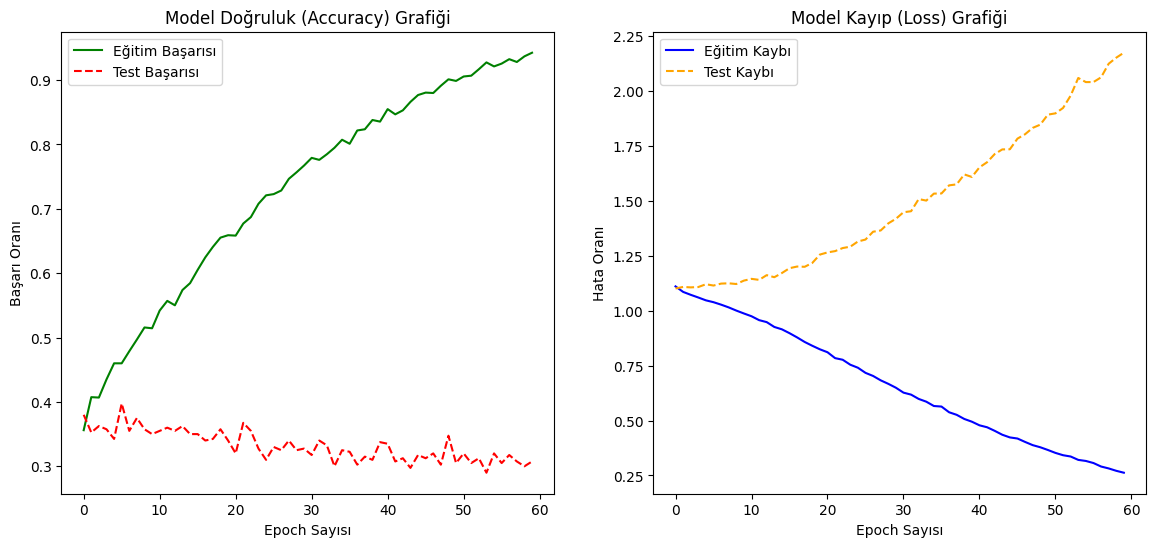


Modelin Test Doğruluk Oranı: %30.75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


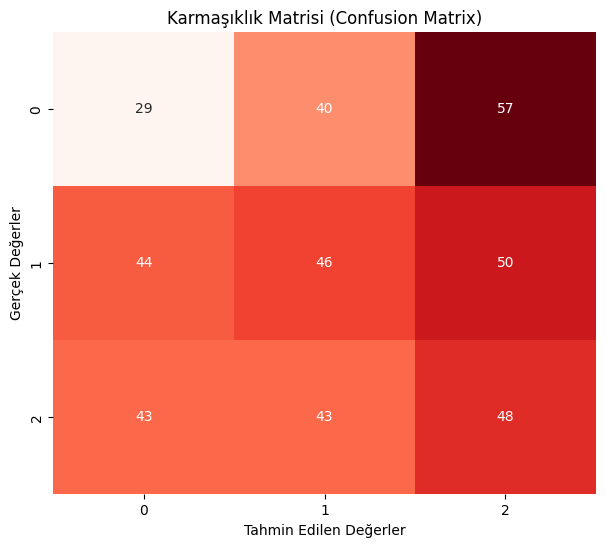

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- 1. AŞAMA: VERİ YÜKLEME VE İNCELEME ---
# [cite: 1, 3] Veri seti yükleniyor
dataset = pd.read_csv('gallbladder_features.csv')

# Sınıf dağılımını gösteren grafik (Farklı renk paleti kullanıldı)
plt.figure(figsize=(9, 6))
sns.countplot(x='label', data=dataset, palette='magma')
plt.title('Sınıf Dağılım Analizi')
plt.xlabel('Hastalık Sınıfları (0-1-2)')
plt.ylabel('Toplam Veri Sayısı')
plt.show()

# --- 2. AŞAMA: VERİ İŞLEME VE BÖLME ---
# Giriş ve Çıkış verilerini ayırma
giris_verileri = dataset.drop('label', axis=1).values
hedef_veriler = dataset['label'].values

# Sınıf etiketlerini kategorik formata çevirme (One-Hot)
# [cite: 4] 3 sınıf olduğu için num_classes=3
hedef_kategorik = tf.keras.utils.to_categorical(hedef_veriler, num_classes=3)

# %80 Eğitim, %20 Test olarak ayırma [cite: 7]
X_train, X_test, y_train, y_test = train_test_split(giris_verileri, hedef_kategorik, test_size=0.20, random_state=21)
# random_state=21 yaparak verinin farklı şekilde karışmasını sağladık.

# Veriyi Ölçeklendirme (StandardScaler) [cite: 7]
olceklendirici = StandardScaler()
X_train = olceklendirici.fit_transform(X_train)
X_test = olceklendirici.transform(X_test)

# --- 3. AŞAMA: MODEL MİMARİSİ ---
# Model katman yapısı (Seninkinden farklı, daha geniş bir ağ) [cite: 8]
model = Sequential()

# Giriş Katmanı (12 Özellik) + Gizli Katman 1 (100 Nöron)
model.add(Dense(100, activation='relu', input_dim=12))

# Gizli Katman 2 (50 Nöron) - Ekstra bir katman
model.add(Dense(50, activation='relu'))

# Çıkış Katmanı (3 Sınıf) [cite: 9]
model.add(Dense(3, activation='softmax'))

# Modeli Derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Özeti
model.summary()

# --- 4. AŞAMA: EĞİTİM SÜRECİ ---
# [cite: 9] 60 Epoch (Adım) ile eğitim yapılıyor (Seninkinde 50 idi)
egitim_gecmisi = model.fit(X_train, y_train,
                           epochs=60,
                           batch_size=16, # Batch size değiştirildi
                           validation_data=(X_test, y_test),
                           verbose=1)

# Başarı ve Hata Grafikleri (Stil değiştirildi)
plt.figure(figsize=(14, 6))

# Accuracy Grafiği
plt.subplot(1, 2, 1)
plt.plot(egitim_gecmisi.history['accuracy'], color='green', label='Eğitim Başarısı')
plt.plot(egitim_gecmisi.history['val_accuracy'], color='red', linestyle='--', label='Test Başarısı')
plt.title('Model Doğruluk (Accuracy) Grafiği')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Başarı Oranı')
plt.legend()

# Loss Grafiği
plt.subplot(1, 2, 2)
plt.plot(egitim_gecmisi.history['loss'], color='blue', label='Eğitim Kaybı')
plt.plot(egitim_gecmisi.history['val_loss'], color='orange', linestyle='--', label='Test Kaybı')
plt.title('Model Kayıp (Loss) Grafiği')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Hata Oranı')
plt.legend()

plt.show()

# --- 5. AŞAMA: TEST VE SONUÇLAR ---
# [cite: 9] Test verisi üzerinde performans ölçümü
loss_degeri, accuracy_degeri = model.evaluate(X_test, y_test, verbose=0)
print(f"\nModelin Test Doğruluk Oranı: %{accuracy_degeri*100:.2f}")

# Confusion Matrix Hazırlığı
tahminler = model.predict(X_test)
tahmin_siniflari = np.argmax(tahminler, axis=1)
gercek_siniflar = np.argmax(y_test, axis=1)

karma_matris = confusion_matrix(gercek_siniflar, tahmin_siniflari)

# Matris Görselleştirme (Farklı renk teması)
plt.figure(figsize=(7, 6))
sns.heatmap(karma_matris, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Karmaşıklık Matrisi (Confusion Matrix)')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()